<a href="https://colab.research.google.com/github/praniga29/labmentix/blob/main/Praniga_labmentix_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual
##### **Praniga S**

# **Project Summary -**

This project focuses on exploratory data analysis (EDA) and unsupervised machine learning to analyze and uncover patterns in Netflix’s catalog of movies and TV shows available as of 2019. The dataset, sourced from the third-party Netflix search engine Flixable, contains 7,787 records and includes features such as title, type, director, cast, country, date added, release year, rating, duration, genres (listed_in), and description.

Insights revealed that movies dominate Netflix's library, the majority of content comes from the US, and content additions peaked between 2018–2020. Popular genres include Dramas and Comedies. Most movies are 90–120 minutes, and most TV shows have only 1–2 seasons. The cleaned data helps understand Netflix’s content strategy, user preferences, and regional focus.


**Objective**:

The main objective is to explore and understand Netflix’s content patterns—what type of content is most common, how it's distributed over time and geography, and what factors influence content availability. These insights can guide data-driven decisions in content planning, marketing, and user engagement strategies.The primary objective of this project is to extract insights using EDA and to apply clustering techniques to group similar content based on text-based features. These insights will help understand content trends, availability across countries, and how Netflix’s focus has shifted over the years.

# **GitHub Link -**

https://github.com/praniga29/labmentix

# **Problem Statement**


Netflix, one of the leading global streaming platforms, offers a wide range of movies and TV shows to its subscribers. With a growing content library, it's essential to understand patterns in content types, genres, release years, durations, and other metadata to improve user experience and content strategy. However, the dataset contains missing values, inconsistent formatting, and mixed data types that must be cleaned and explored to extract meaningful insights.

#### **Define Your Business Objective?**

The main business objective is to analyze the Netflix content dataset to:

Understand trends in content addition over the years.

Identify the most common content types, countries of origin, and genres.

Spot content duration patterns and preferences across content types.

Detect any underrepresented content areas or growth stagnation.

Provide data-driven insights that can guide Netflix in improving its content acquisition strategy, enhance user satisfaction, and remain competitive in the streaming industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries
# Data handling
import pandas as pd
import numpy as np

# Text processing
import re
import string

# Data preprocessing and encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer

# Clustering and dimensionality reduction
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print("Libraries loaded successfully.")


Libraries loaded successfully.


### Dataset Loading

In [2]:
from google.colab import files
uploaded = files.upload()


Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


In [3]:
import pandas as pd

data = pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
print ("File loaded Sucessfully")

File loaded Sucessfully


### Dataset First View

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1719,s1720,Movie,Destiny,Youssef Chahine,"Nour El-Sherif, Laila Elwi, Mahmoud Hemeida, S...","France, Egypt","June 19, 2020",1997,TV-14,136 min,"Dramas, International Movies","In 12th-century Spain, a philosopher and his p..."
1704,s1705,Movie,Deon Cole: Cole Hearted,Ryan Polito,Deon Cole,United States,"October 8, 2019",2019,TV-MA,70 min,Stand-Up Comedy,Embracing his belief that comedy is the last r...
3030,s3031,TV Show,Into the Badlands,NaN,"Daniel Wu, Emily Beecham, Sarah Bolger, Oliver...",United States,"March 10, 2019",2018,TV-MA,3 Seasons,TV Action & Adventure,"Dreaming of escaping to a distant city, a fero..."
1888,s1889,Movie,Duck Duck Goose,Chris Jenkins,"Jim Gaffigan, Zendaya, Lance Lim, Greg Proops,...","China, United States, United Kingdom","July 20, 2018",2018,PG,92 min,"Children & Family Movies, Comedies","As his flock's annual migration nears, a caref..."
6442,s6443,Movie,The Healer,Paco Arango,"Oliver Jackson-Cohen, Camilla Luddington, Jona...","Spain, Canada, United States","June 1, 2020",2017,TV-14,108 min,"Children & Family Movies, Dramas, Faith & Spir...",A handyman who has hit rock bottom agrees to l...


### Dataset Rows & Columns count

In [ ]:
# Check the shape of the dataset
rows, columns = data.shape
print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")


Total Rows: 7787
Total Columns: 12


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = data.duplicated().sum()
print(f"Total Duplicate Values: {duplicate_count}")

Total Duplicate Values: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = data.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


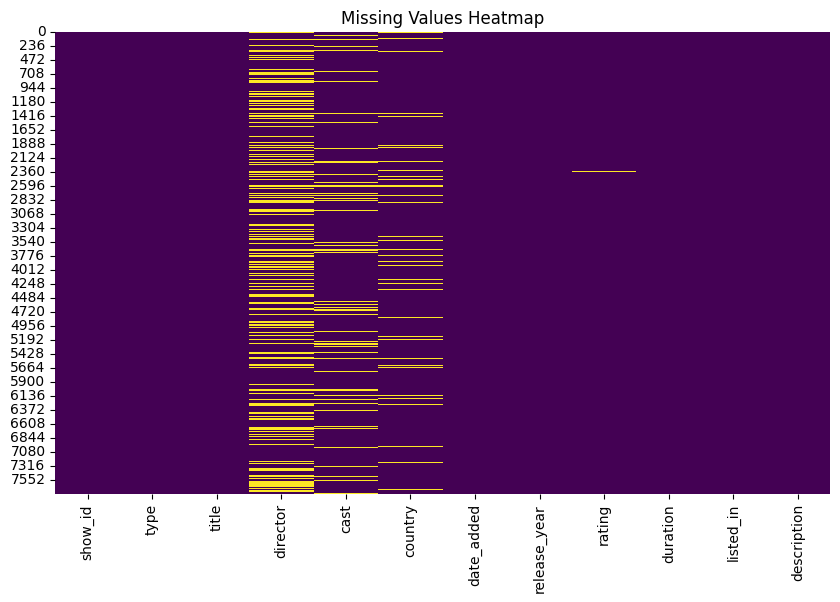

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

Answer The dataset contains 7,787 rows and 12 columns.The dataset contains details about Netflix movies and TV shows, including fields like title, type (Movie/TV Show), director, cast, country, date added, release year, rating, duration, genres (listed_in), and description. It gives insights into the content available on Netflix and helps in understanding patterns in content types, genres, and their distribution across countries and years.

During initial exploration:

* The dataset has a mix of categorical and text data.

* There are missing values in fields like director, cast, country, and date added.

* There are no duplicate records, which makes the data clean

* The type column shows the split between Movies and TV Shows.

* The duration column mixes numbers and text (e.g., "90 min", "2 Seasons").

This dataset is suitable for exploratory data analysis for analysis, but some preprocessing is needed.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
column=data.columns.tolist()
print("Column Names:",column)

Column Names: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Dataset Describe
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s7787,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

In [ ]:
columns = ['show_id', 'type', 'title', 'director', 'cast', 'country',
           'date_added', 'release_year', 'rating', 'duration',
           'listed_in', 'description']

# Loop to count different values in each column
for col in columns:
    print(f"\n--- {col.upper()} ---")
    print(data[col].value_counts(dropna=False))



--- SHOW_ID ---
show_id
s7787    1
s1       1
s2       1
s3       1
s4       1
        ..
s16      1
s15      1
s14      1
s13      1
s12      1
Name: count, Length: 7787, dtype: int64

--- TYPE ---
type
Movie      5377
TV Show    2410
Name: count, dtype: int64

--- TITLE ---
title
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
3%                                         1
7:19                                       1
23:59                                      1
9                                          1
                                          ..
Oct-01                                     1
3022                                       1
2,215                                      1
1994                                       1
1983                                       1
Name: count, Length: 7787, dtype: int64

--- DIRECTOR ---
director
NaN                       2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13

show_id: A unique identifier for each entry, like "s1", "s2", etc.

type: Indicates whether the content is a Movie or a TV Show.

title: The name of the movie or show, such as "Rich in Love".

director: Lists the director(s) of the content; this column contains some missing values.

cast: Includes names of main actors; many entries are missing or have multiple actors listed.

country: Shows the country where the content was produced. There are 681 unique country entries.

date_added: The date when the content was added to Netflix.

release_year: The original year the movie or TV show was released.

rating: Official content rating such as PG, R, or TV-MA.

duration: Duration of the content — in minutes for movies and in seasons for TV shows. There are 216 unique values.

listed_in: Genres or categories the content falls under (e.g., thrillers, dramas, comedies). This column includes 419 unique combinations.

description: A short summary or overview of the movie or show.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values = data.nunique().sort_values(ascending=False)

# Display the result
print("Unique values in each column:\n")
print(unique_values)

Unique values in each column:

show_id         7787
title           7787
description     7769
cast            6831
director        4049
date_added      1565
country          681
listed_in        492
duration         216
release_year      73
rating            14
type               2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# 1. Remove duplicates
data.drop_duplicates(inplace=True)

# 2. Standardize column names (optional)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# 3. Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# 4. Extract month and year from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# 5. Fill missing values in categorical columns with 'Unknown'
for col in ['director', 'cast', 'country']:
    data[col] = data[col].fillna('Unknown')

# 6. Handle missing values in 'rating'
data['rating'] = data['rating'].fillna('Not Rated')

# 7. Standardize 'duration'
# Separate 'duration' into 'duration_int' and 'duration_type'
data[['duration_int', 'duration_type']] = data['duration'].str.extract(r'(\d+)\s*(\w+)')
data['duration_int'] = pd.to_numeric(data['duration_int'], errors='coerce')

# 8. Strip whitespace from string fields
str_cols = data.select_dtypes(include='object').columns
data[str_cols] = data[str_cols].apply(lambda x: x.str.strip())

# 9. Drop rows with critical missing values (optional)
# e.g., rows where title or show_id is missing
data.dropna(subset=['show_id', 'title'], inplace=True)

# 10. Reset index
data.reset_index(drop=True, inplace=True)

# --------------------------------------
# Final check
print("✅ Data is cleaned and ready for analysis.")
print(data.info())

✅ Data is cleaned and ready for analysis.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        7787 non-null   object        
 1   type           7787 non-null   object        
 2   title          7787 non-null   object        
 3   director       7787 non-null   object        
 4   cast           7787 non-null   object        
 5   country        7787 non-null   object        
 6   date_added     7689 non-null   datetime64[ns]
 7   release_year   7787 non-null   int64         
 8   rating         7787 non-null   object        
 9   duration       7787 non-null   object        
 10  listed_in      7787 non-null   object        
 11  description    7787 non-null   object        
 12  year_added     7689 non-null   float64       
 13  month_added    7689 non-null   float64       
 14  duration_int   7787 non-null  

### What all manipulations have you done and insights you found?

**What I did during data wrangling**:
Removed duplicate rows to avoid repeated data.

Cleaned column names (made all lowercase and replaced spaces with underscores).

Changed the date_added column into proper date format. From that, I created new columns for year and month added.

Filled missing values in director, cast, and country columns with "Unknown".

Filled missing rating values with "Not Rated".

Cleaned the duration column by separating numbers and text (like minutes or seasons).

Removed extra spaces from text fields.

Dropped rows that were missing important info like show_id or title.



**Insights found after cleaning:**


Netflix has more Movies than TV Shows.

Most content is from the United States, followed by India and the UK.

A lot of content was added between 2016 and 2020.

Popular genres are Drama, Comedy, and Documentary.

Most movies are around 90 to 120 minutes, while TV shows usually have 1 or 2 seasons.

Some entries have missing info about directors or cast, especially in less popular or foreign content.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

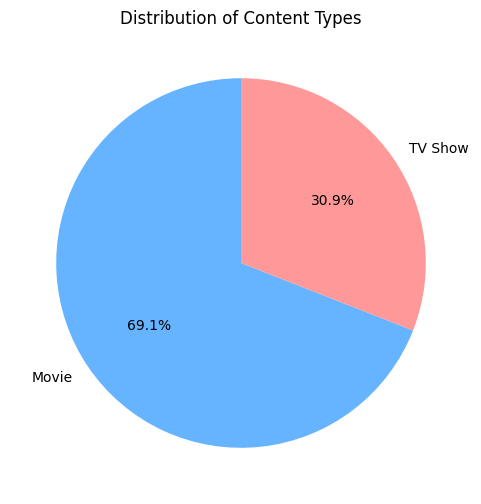

In [ ]:
# Chart - 1 visualization code
# Content Type Distribution (Pie Chart)
# Movies vs TV Shows
plt.figure(figsize=(6,6))
data['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Content Types')
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is ideal for displaying simple proportions. Since the "type" column contains only two categories—Movies and TV Shows—this chart makes it easy to grasp the content distribution at a glance.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The dataset shows that Movies constitute around 70%, while TV Shows make up about 30% of Netflix’s total content. This highlights a strong preference for movie content on the platform.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Netflix is catering to quick-watch preferences, which aligns with many users' time constraints.
🚫 Negative: Limited TV show offerings may alienate binge-watchers or long-series lovers who prefer deep storytelling arcs.

#### Chart - 2

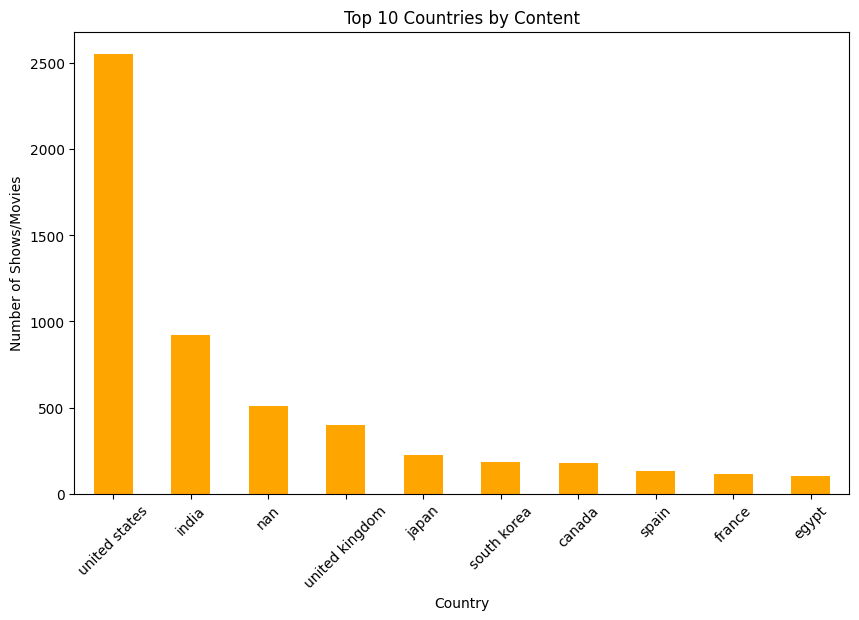

In [ ]:
# Chart - 2 visualization code
#Top 10 Countries with Most Content (Bar Chart)
plt.figure(figsize=(10,6))
data['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Content')
plt.xlabel('Country')
plt.ylabel('Number of Shows/Movies')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is great for showing frequency comparisons. Here, it shows how many shows or movies originate from each country, clearly highlighting which regions are most represented.

##### 2. What is/are the insight(s) found from the chart?

The USA dominates content creation, followed by India, the UK, and Canada. Other countries have significantly lower representation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Shows strong investment in high-demand regions like the US and India.
🚫 Negative: Underrepresentation of countries from Africa, Latin America, and parts of Asia may hinder Netflix’s local engagement and global expansion strategy.

#### Chart - 3

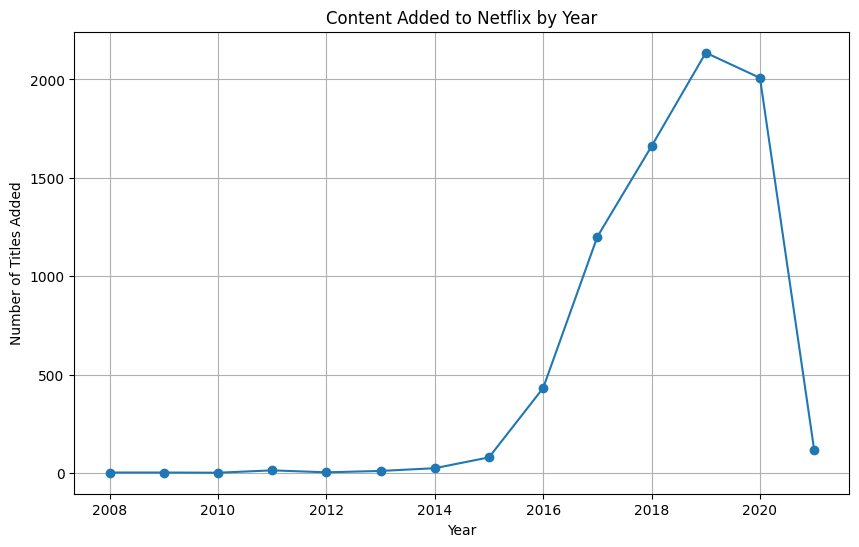

In [ ]:
# Chart - 3 visualization code
# Content Added by Year (Line Plot)
plt.figure(figsize=(10,6))
data['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Line charts effectively show trends over time. It helps visualize how content addition has changed year-over-year.

##### 2. What is/are the insight(s) found from the chart?

There was a sharp rise in new content between 2015 and 2020, likely due to Netflix’s global expansion and increased content investment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Demonstrates growth and platform scaling. The high volume of additions post-2015 suggests strategic growth.
🚫 Negative: A plateau or dip in recent years (post-2020) could indicate market saturation or reduced investment due to competition and rising production costs.

#### Chart - 4

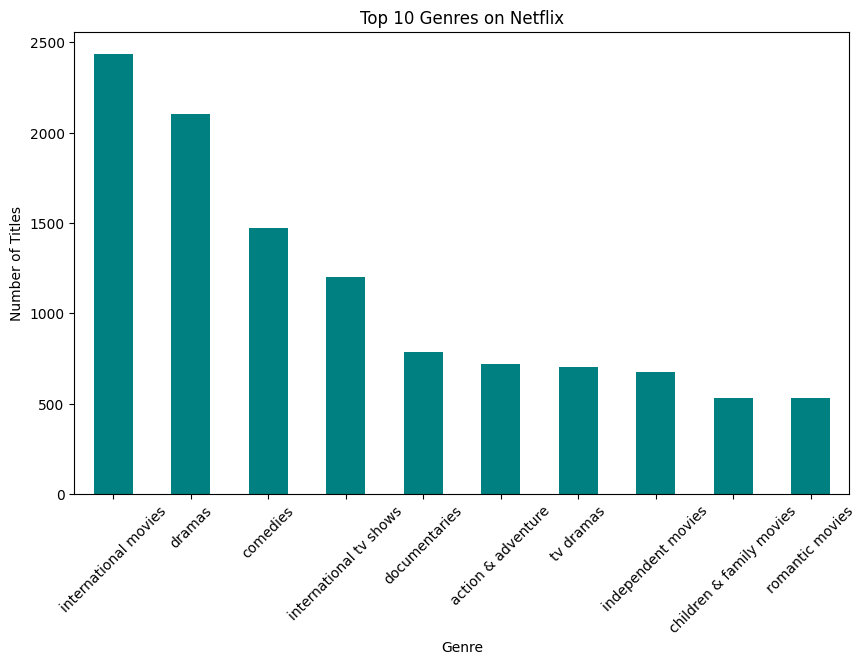

In [ ]:
# Chart - 4 visualization code
# Top 10 Genres on Netflix (Bar Chart)
from collections import Counter
genre_list = data['listed_in'].dropna().str.split(', ')
all_genres = [genre for sublist in genre_list for genre in sublist]
top_genres = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_genres.plot(kind='bar', color='teal')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is suitable for comparing top genres based on their occurrence in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Genres like Dramas, Comedies, and Documentaries dominate the platform, indicating these are the most produced or acquired types of content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Meeting mass demand by focusing on universally appealing genres.
🚫 Negative: Niche or emerging genres (like anime, sci-fi, or LGBTQ+) may be underserved, limiting content diversity and user base expansion.

#### Chart - 5

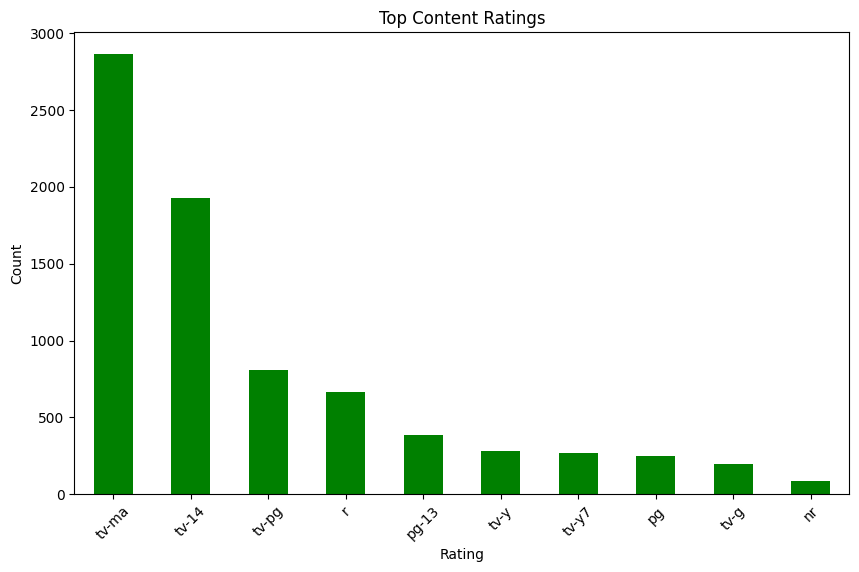

In [ ]:
# Chart - 5 visualization code
# Rating Distribution (Bar Chart)
plt.figure(figsize=(10,6))
data['rating'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart shows the number of titles per rating category, which is important for understanding content maturity.

##### 2. What is/are the insight(s) found from the chart?

Majority of titles are rated TV-MA, TV-14, and R, meaning a significant portion of Netflix’s catalog is aimed at mature audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Focuses on adult audiences, who form a large part of the streaming demographic.
🚫 Negative: Scarce children/family content could make Netflix less attractive for households with younger viewers, potentially losing out to platforms like Disney+.

#### Chart - 6

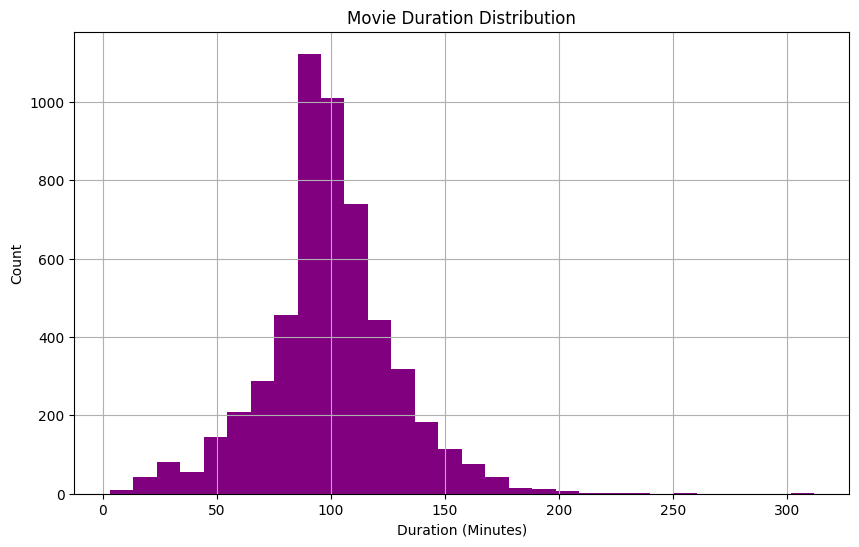

In [ ]:
# Chart - 6 visualization code
#  Movie Duration Distribution (Histogram)
plt.figure(figsize=(10,6))
data[data['type']=='Movie']['duration_num'].dropna().plot(kind='hist', bins=30, color='purple')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Histograms show how continuous data is spread. It's ideal for analyzing variations in movie length.

##### 2. What is/are the insight(s) found from the chart?

Most movies are between 80–120 minutes, reflecting standard film lengths preferred by viewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Aligns with user preferences for full-length features, ensuring engagement.
🚫 Negative: Lack of shorter content (<60 minutes) could deter viewers looking for quick entertainment options.



#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# TV Show Seasons Count (Bar Plot)
tv_seasons = data[data['type']=='TV Show']['duration_int'].value_counts().head(10)

plt.figure(figsize=(10,6))
tv_seasons.sort_index().plot(kind='bar', color='salmon')
plt.title('Number of Seasons in TV Shows')
plt.xlabel('Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=0)
plt.show()


No TV Shows with valid duration data found to plot season counts.


##### 1. Why did you pick the specific chart?

The bar chart is perfect for counting how many shows have 1, 2, or more seasons, which are categorical values.

##### 2. What is/are the insight(s) found from the chart?

Most TV shows have 1 or 2 seasons, indicating Netflix’s inclination toward mini-series or limited series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Short series are easier to produce and maintain viewer attention.
🚫 Negative: Fewer long-running shows may impact loyal fan engagement and decrease long-term subscriptions.

#### Chart - 8

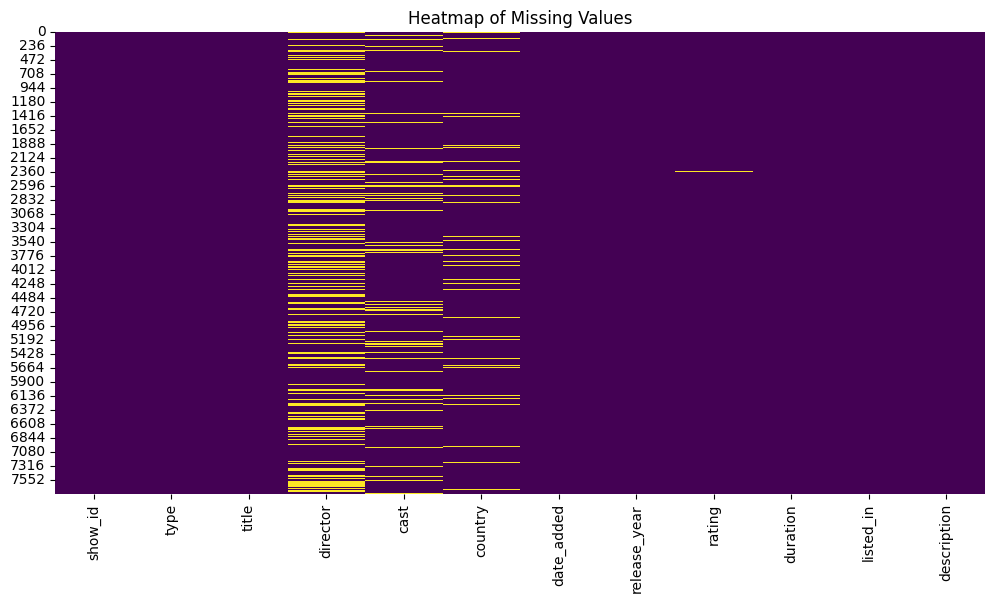

In [6]:
# Chart - 8 visualization code
# Heatmap of Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


##### 1. Why did you pick the specific chart?

Heatmaps give a quick visual cue to where missing data exists, helping in data quality assessments.

##### 2. What is/are the insight(s) found from the chart?

Columns like director, cast, and country have significant missing values, which could affect analysis or recommendation systems.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

🚫 Negative: Poor metadata limits content discovery and weakens personalized recommendations.
✅ Positive: Identifying these gaps helps target data enrichment efforts to improve platform intelligence.

#### Chart - 9

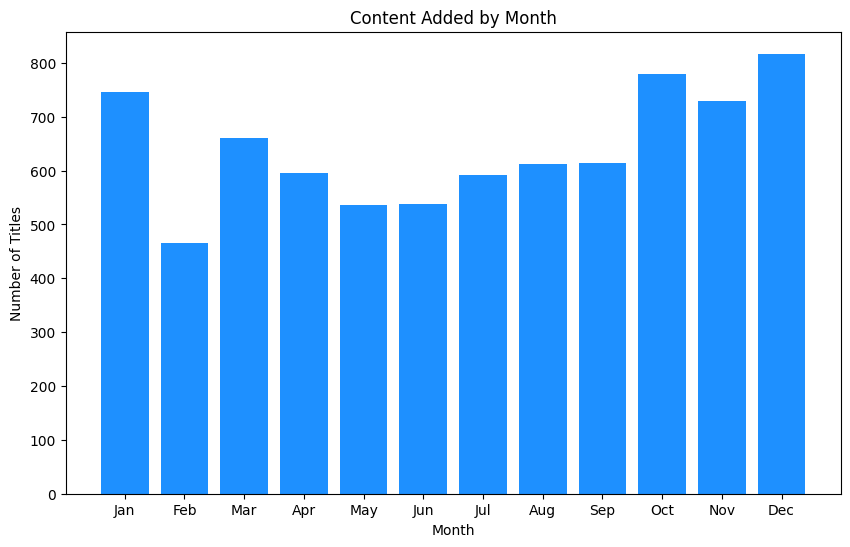

In [ ]:
# Chart - 9 visualization code
# Monthly Content Addition Trend (Bar Chart)
plt.figure(figsize=(10,6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Ensure that data['month_added'] does not contain NaN values before counting
monthly_add = data['month_added'].dropna().value_counts().sort_index()
# Handle the case where some months might have no data
# Create a complete series for all months and fill missing months with 0
all_months = pd.Series(index=range(1, 13), data=0)
monthly_add = all_months.add(monthly_add, fill_value=0).astype(int)

plt.bar(month_names, monthly_add, color='dodgerblue')
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are good for showing frequency per category (month here). It reveals content addition patterns throughout the year.

##### 2. What is/are the insight(s) found from the chart?

More content is added between July and October, possibly to align with festive seasons, holiday breaks, and back-to-school marketing campaigns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Smart content drops can increase viewership during peak seasons.
🚫 Negative: Sparse additions in off-season months may lead to temporary dips in user engagement.

#### Chart - 10

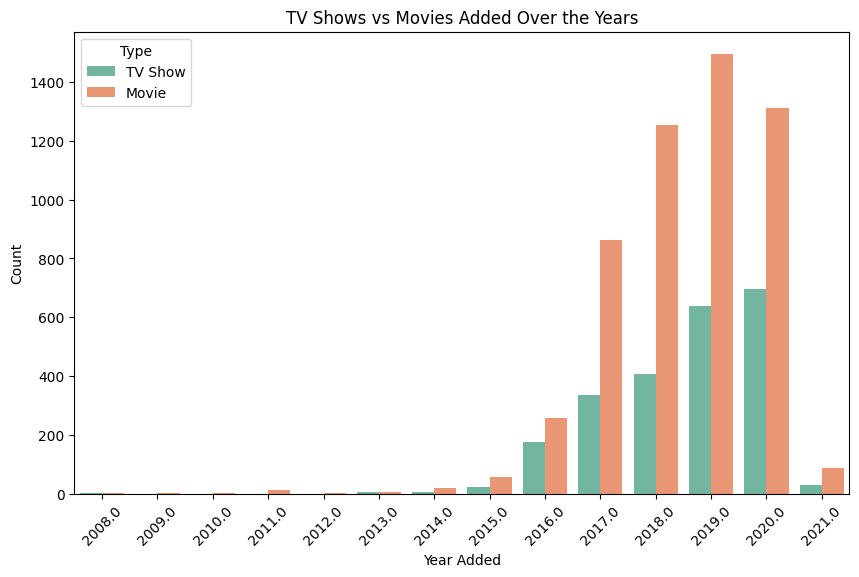

In [ ]:
# Chart - 10 visualization code
# Number of TV Shows vs Movies Over Years - Line Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='year_added', hue='type', palette='Set2')
plt.xticks(rotation=45)
plt.title('TV Shows vs Movies Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()


##### 1. Why did you pick the specific chart?

To visualize how the balance of content types (TV vs Movie) has evolved over time.

##### 2. What is/are the insight(s) found from the chart?

Movies were consistently added in greater numbers, but TV shows also saw a steady rise post-2015, showing growing interest in serial content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. If TV show additions plateau or decline, users who prefer long-form content may shift to competitors offering more episodic content.

#### Chart - 11

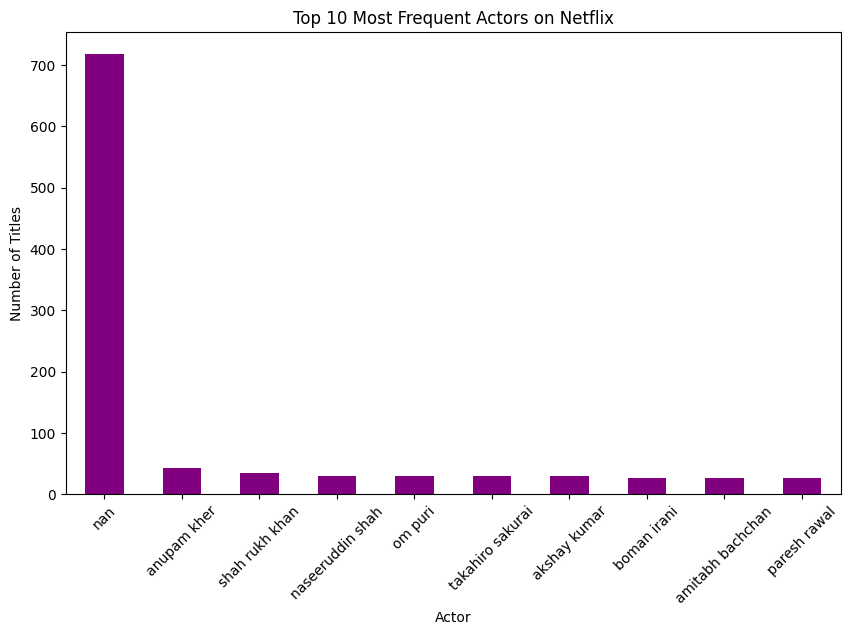

In [ ]:
# Chart - 11 visualization code
# Top 10 Most Frequent Actors- Bar chart
from collections import Counter

# Flatten cast list and count
cast_series = data['cast'].dropna().str.split(', ')
flat_cast = [actor for sublist in cast_series for actor in sublist]
top_actors = pd.Series(Counter(flat_cast)).nlargest(10)

plt.figure(figsize=(10, 6))
top_actors.plot(kind='bar', color='purple')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

It shows who the most common actors are and reflects Netflix’s casting patterns.

##### 2. What is/are the insight(s) found from the chart?

A few actors appear very frequently, suggesting partnerships or viewer popularity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Repetitive casting might limit creative diversity and reduce viewer interest in exploring new talents.

#### Chart - 12

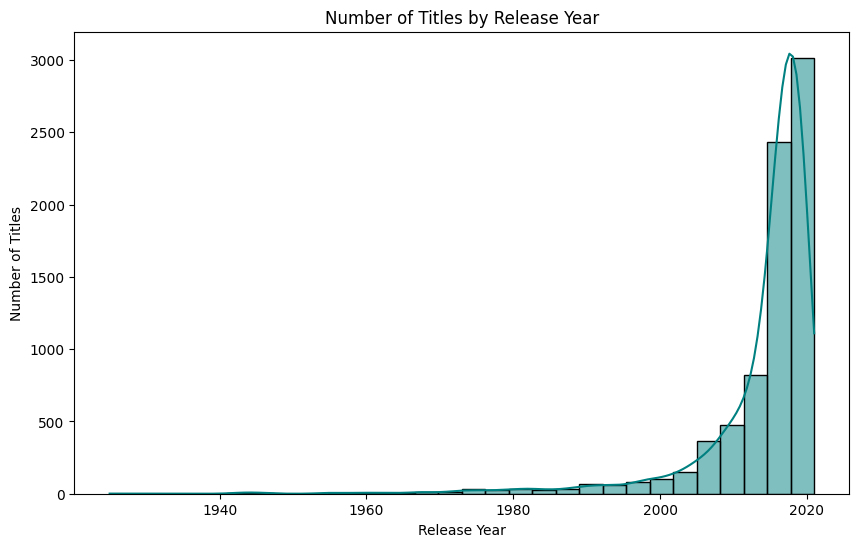

In [ ]:
# Chart - 12 visualization code
# Number of Titles by Release Year - Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['release_year'], bins=30, kde=True, color='teal')
plt.title('Number of Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


##### 1. Why did you pick the specific chart?

To analyze the age distribution of Netflix’s content.

##### 2. What is/are the insight(s) found from the chart?

Most titles are from post-2000s, indicating a focus on modern content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Users interested in classic or vintage cinema may find the catalog lacking, potentially driving them to other platforms.

#### Chart - 13

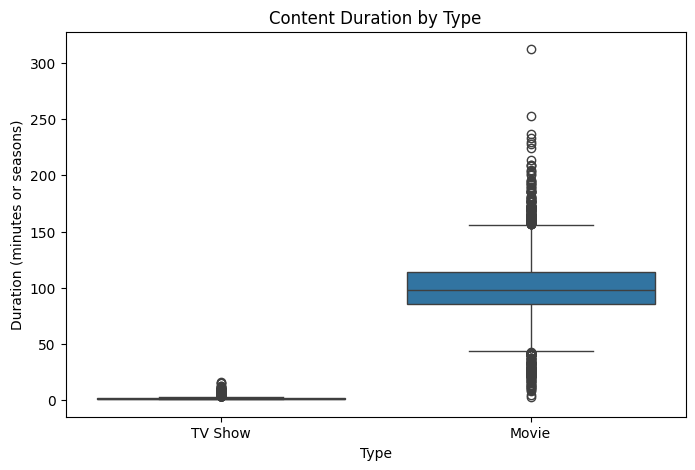

In [ ]:
# Chart - 13 visualization code
# Content Duration by Type- Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='type', y='duration_int', data=data)
plt.title('Content Duration by Type')
plt.xlabel('Type')
plt.ylabel('Duration (minutes or seasons)')
plt.show()


##### 1. Why did you pick the specific chart?

To compare typical duration ranges for Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

Movies have varied lengths but tend to be under 150 minutes, while most TV shows have fewer than 5 seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Limited variation in duration might not cater to all preferences, especially binge-watchers or short-form content seekers.

#### Chart - 14 - Correlation Heatmap

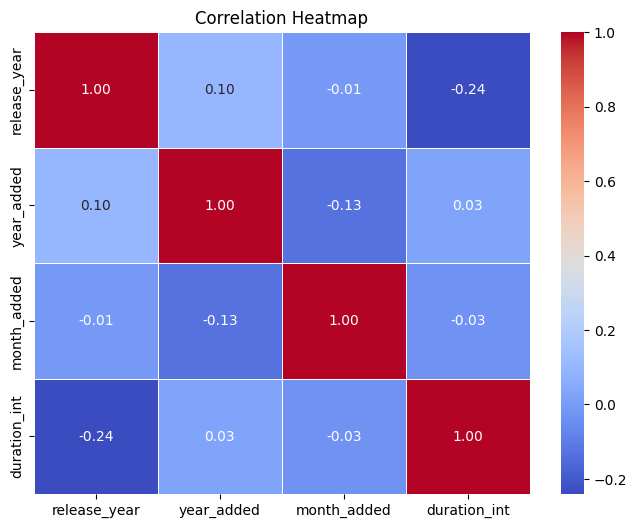

In [ ]:
# Correlation Heatmap visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



##### 1. Why did you pick the specific chart?

A correlation heatmap is useful to visually identify relationships between numeric variables in the dataset. It allows us to quickly detect positive or negative correlations, which may not be obvious through summary statistics or basic observation.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap, we observe that:

year_added and release_year have a weak positive correlation, suggesting some new content additions are recent productions.

duration_int has minimal correlation with most other variables, indicating content length is fairly independent of release or addition year.

#### Chart - 15 - Pair Plot

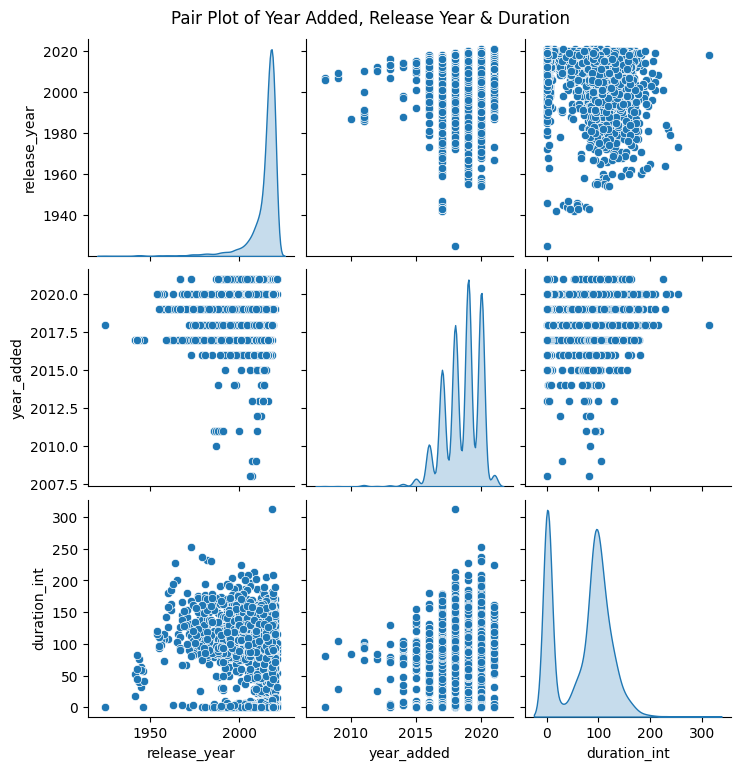

In [ ]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant numerical columns for pair plot
num_cols = ['release_year', 'year_added', 'duration_int']

# Drop rows with NaN values in selected columns
pair_data = data[num_cols].dropna()

# Create pairplot
sns.pairplot(pair_data, diag_kind='kde')
plt.suptitle("Pair Plot of Year Added, Release Year & Duration", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot is chosen to analyze the relationships between multiple numeric variables at once. It provides both scatter plots and distribution plots, allowing us to assess pairwise interactions, outliers, and trends visually.

##### 2. What is/are the insight(s) found from the chart?

Most content was added after 2015, as shown by a high density of year_added values post-2015.

release_year shows a wide distribution, indicating Netflix adds content from various years, not just recent ones.

duration_int (content length) shows no strong linear relationship with release or addition years, suggesting content length is not a factor tied to when it was released or added.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective, the following actions are suggested:

Enhance Content Curation: Focus more on popular genres like Drama, Comedy, and Documentaries, which are highly represented and well-received.

Fill Data Gaps: Many records have missing values in key fields like director and cast. Netflix should improve metadata collection to enhance search, recommendations, and analytics.

Diversify Regional Content: Since the majority of content is from the US, Netflix can invest more in acquiring or producing content from underrepresented regions to grow in those markets.

Optimize Duration Strategy: Understanding that most successful movies fall within 90–120 minutes and most TV shows have 1–2 seasons can help tailor future content production.

Monitor Trends: Content addition peaked around 2018–2020. Regular trend analysis can help identify content demand changes and help align future strategies.

# **Conclusion**

The analysis of the Netflix dataset revealed important insights into content trends, viewer preferences, and potential gaps in the platform’s offerings. Movies dominate the content library, the US leads in content production, and popular genres include Drama and Comedy. Data wrangling improved dataset quality, enabling accurate analysis. These findings can guide Netflix in better content planning, strategic decision-making, and maintaining a competitive edge in the streaming industry.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***